In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/student-study-performance/study_performance.csv


# **1.Data Import & Structure**

In [2]:
df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')

* **gender : sex of students -> (Male/female)**
* **race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)**
* **parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)**
* **lunch : having lunch before test (standard or free/reduced)**
* **test preparation course : complete or not complete before test**
* **math score**
* **reading score**
* **writing score**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Missing Value Check**

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **2. Data Transform**

In [8]:
df = df.rename(columns = {df.columns[1] : 'group',
                         df.columns[2] : 'parent_education_Level',
                         df.columns[4] : 'test_preparation'})

In [9]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['mean_score'] = round(df['total_score'] / 3,1)

**Data Check**

In [10]:
df.head()

,gender,group,parent_education_Level,lunch,test_preparation,math_score,reading_score,writing_score,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


# **3. Data Visualization**

In [11]:
numeric_cols = df.select_dtypes(include = ['int64','double']).columns
object_cols = df.select_dtypes(exclude = ['int64','double']).columns

**Histogram**

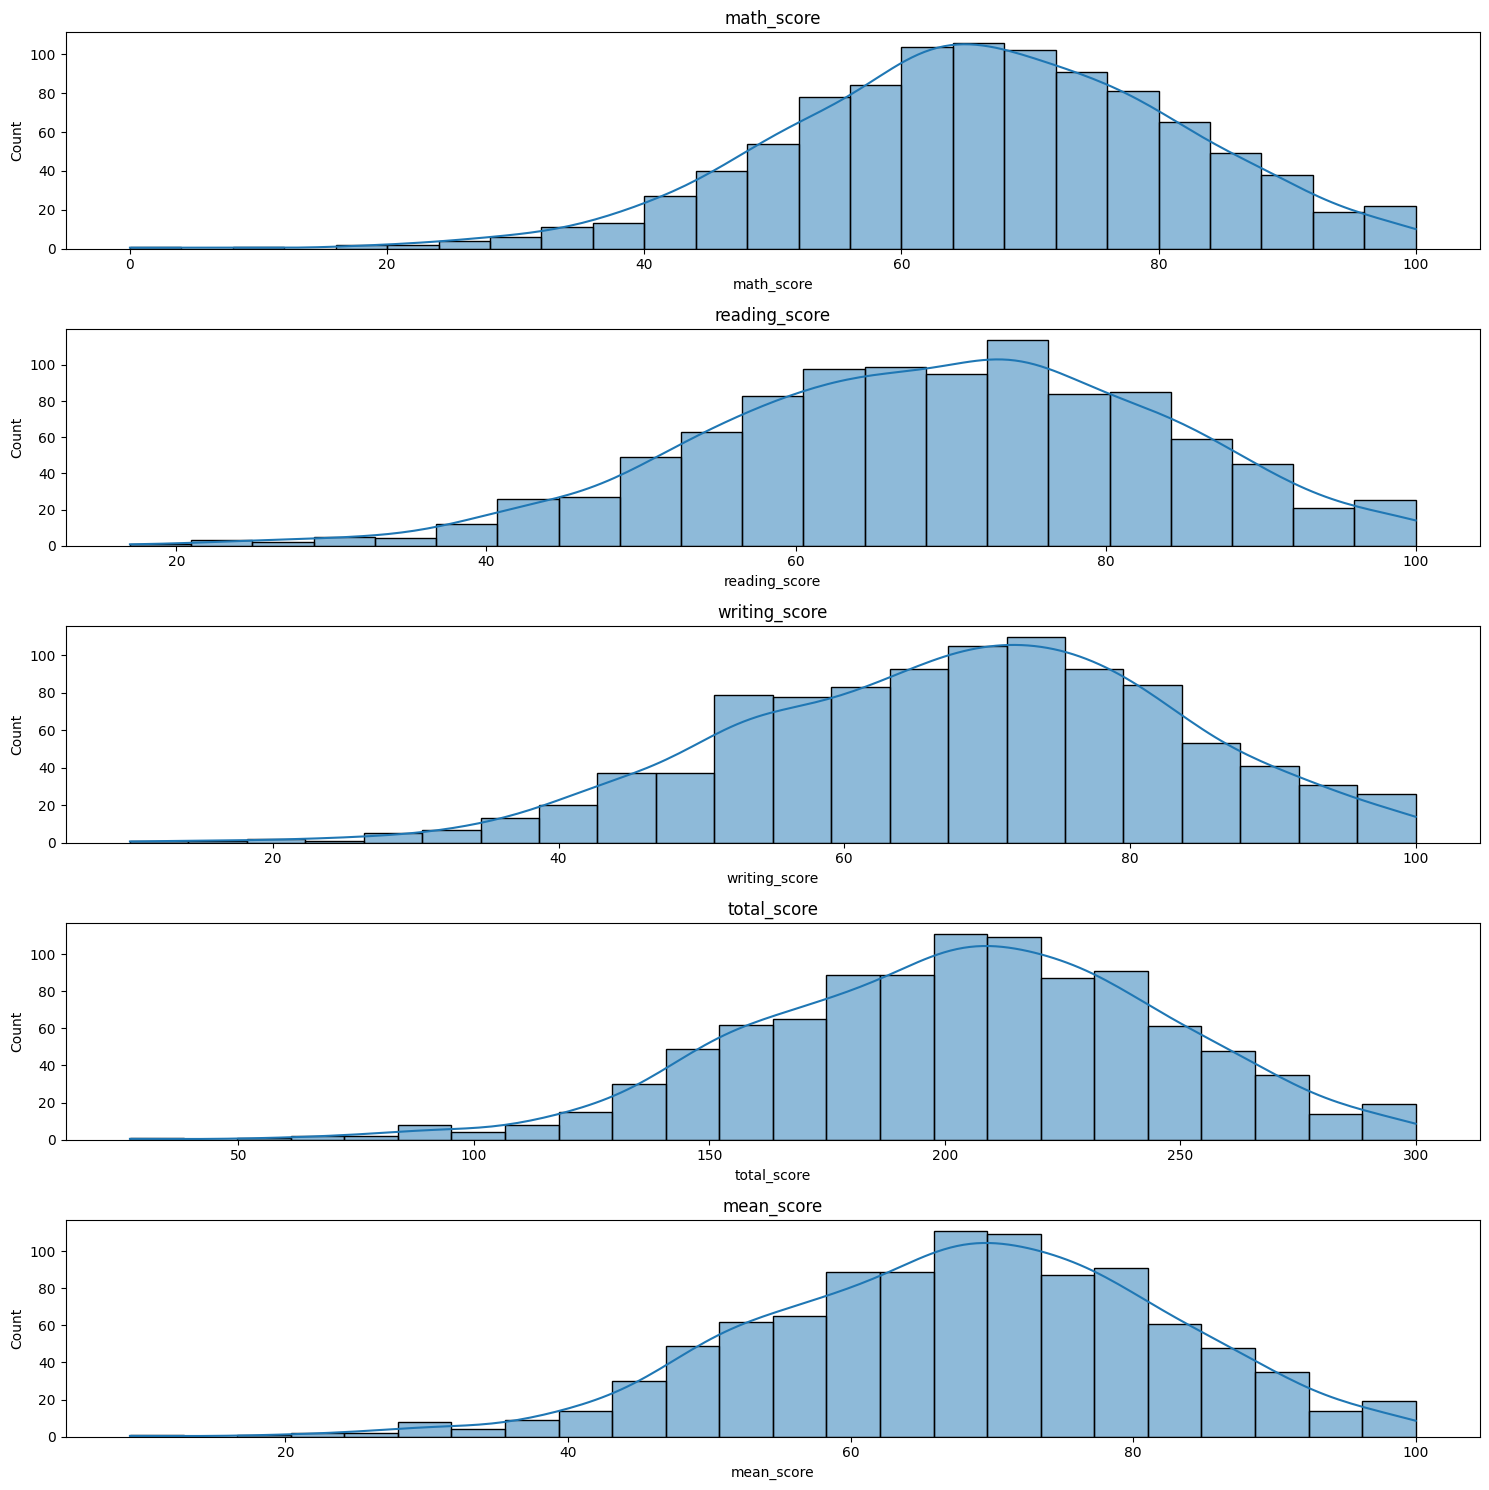

In [12]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

**Boxplot**

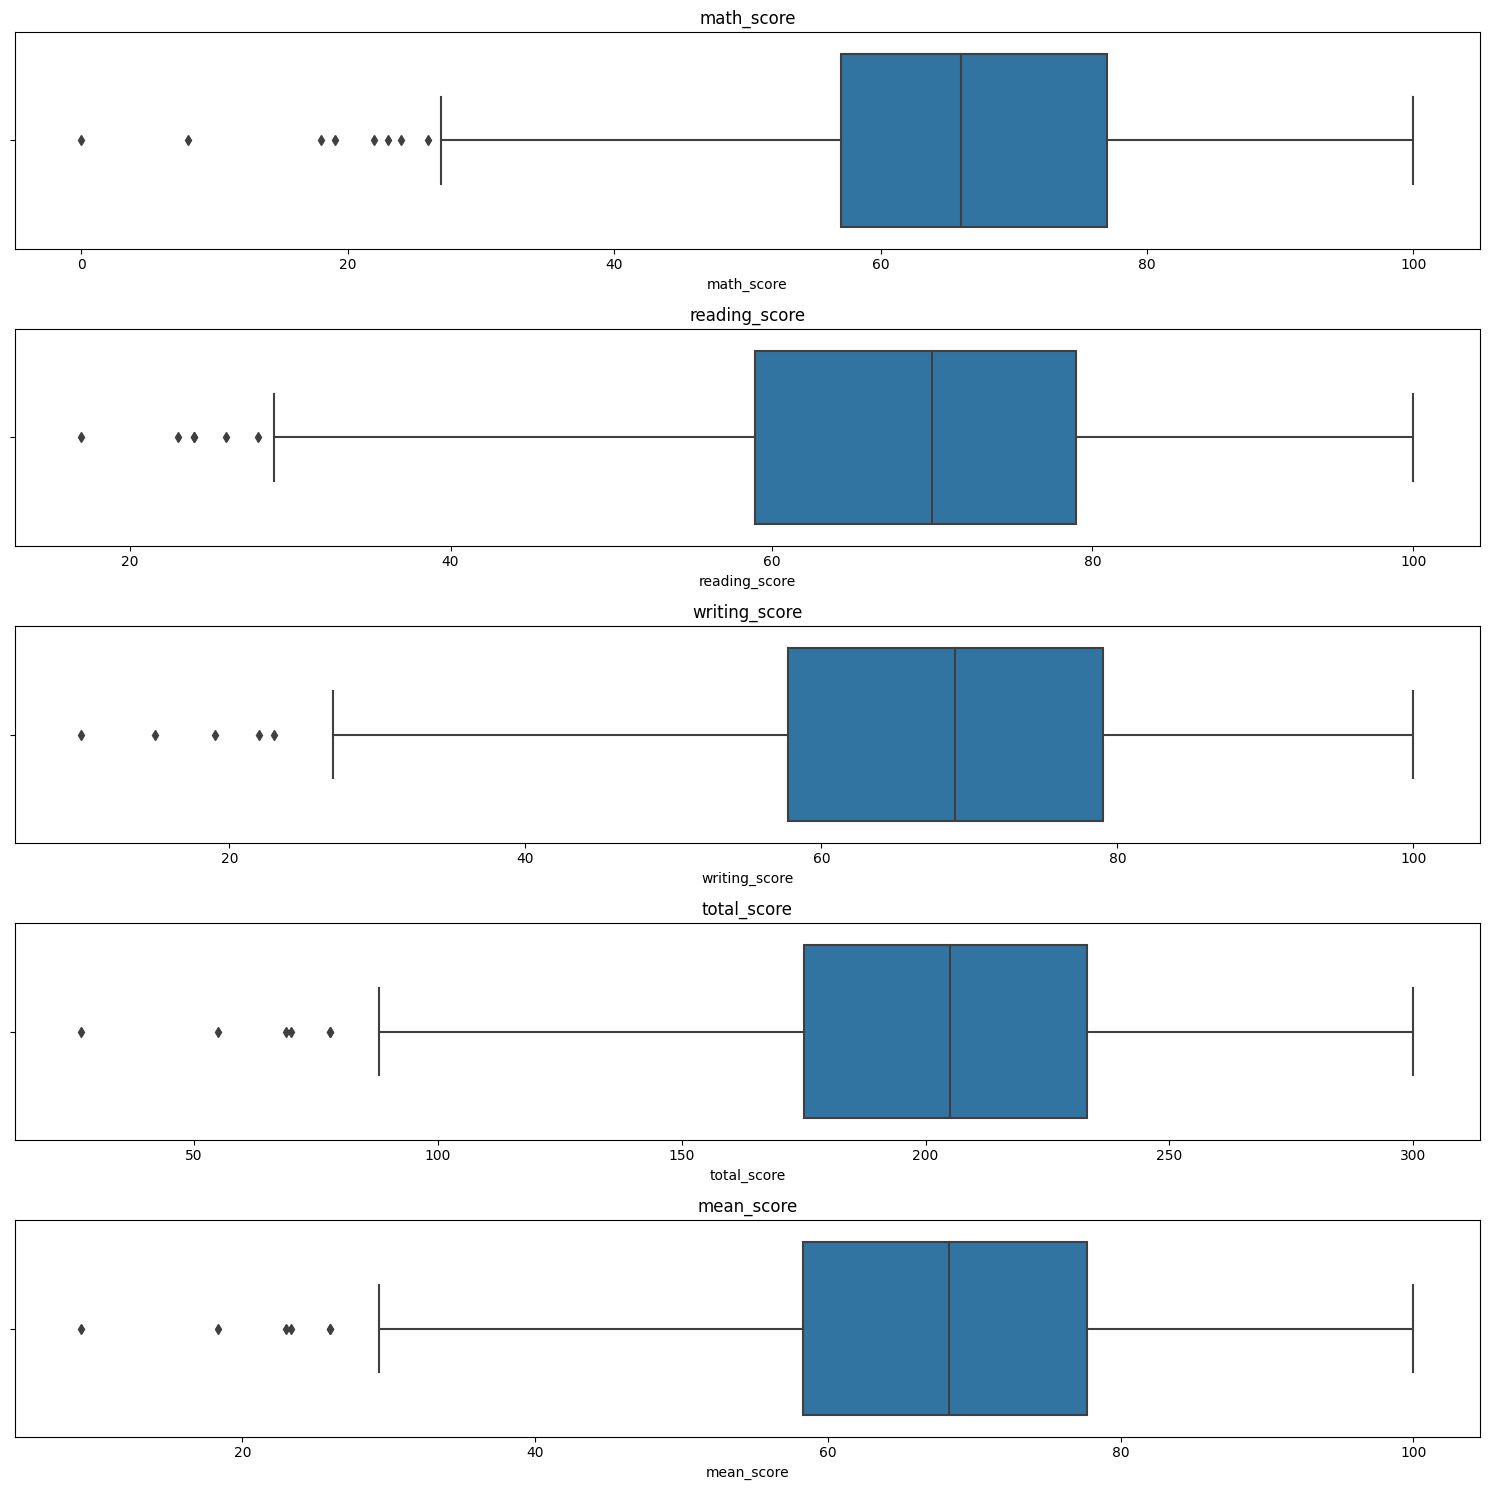

In [13]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data= df, x = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

-----------------

**Counting by object_cols**

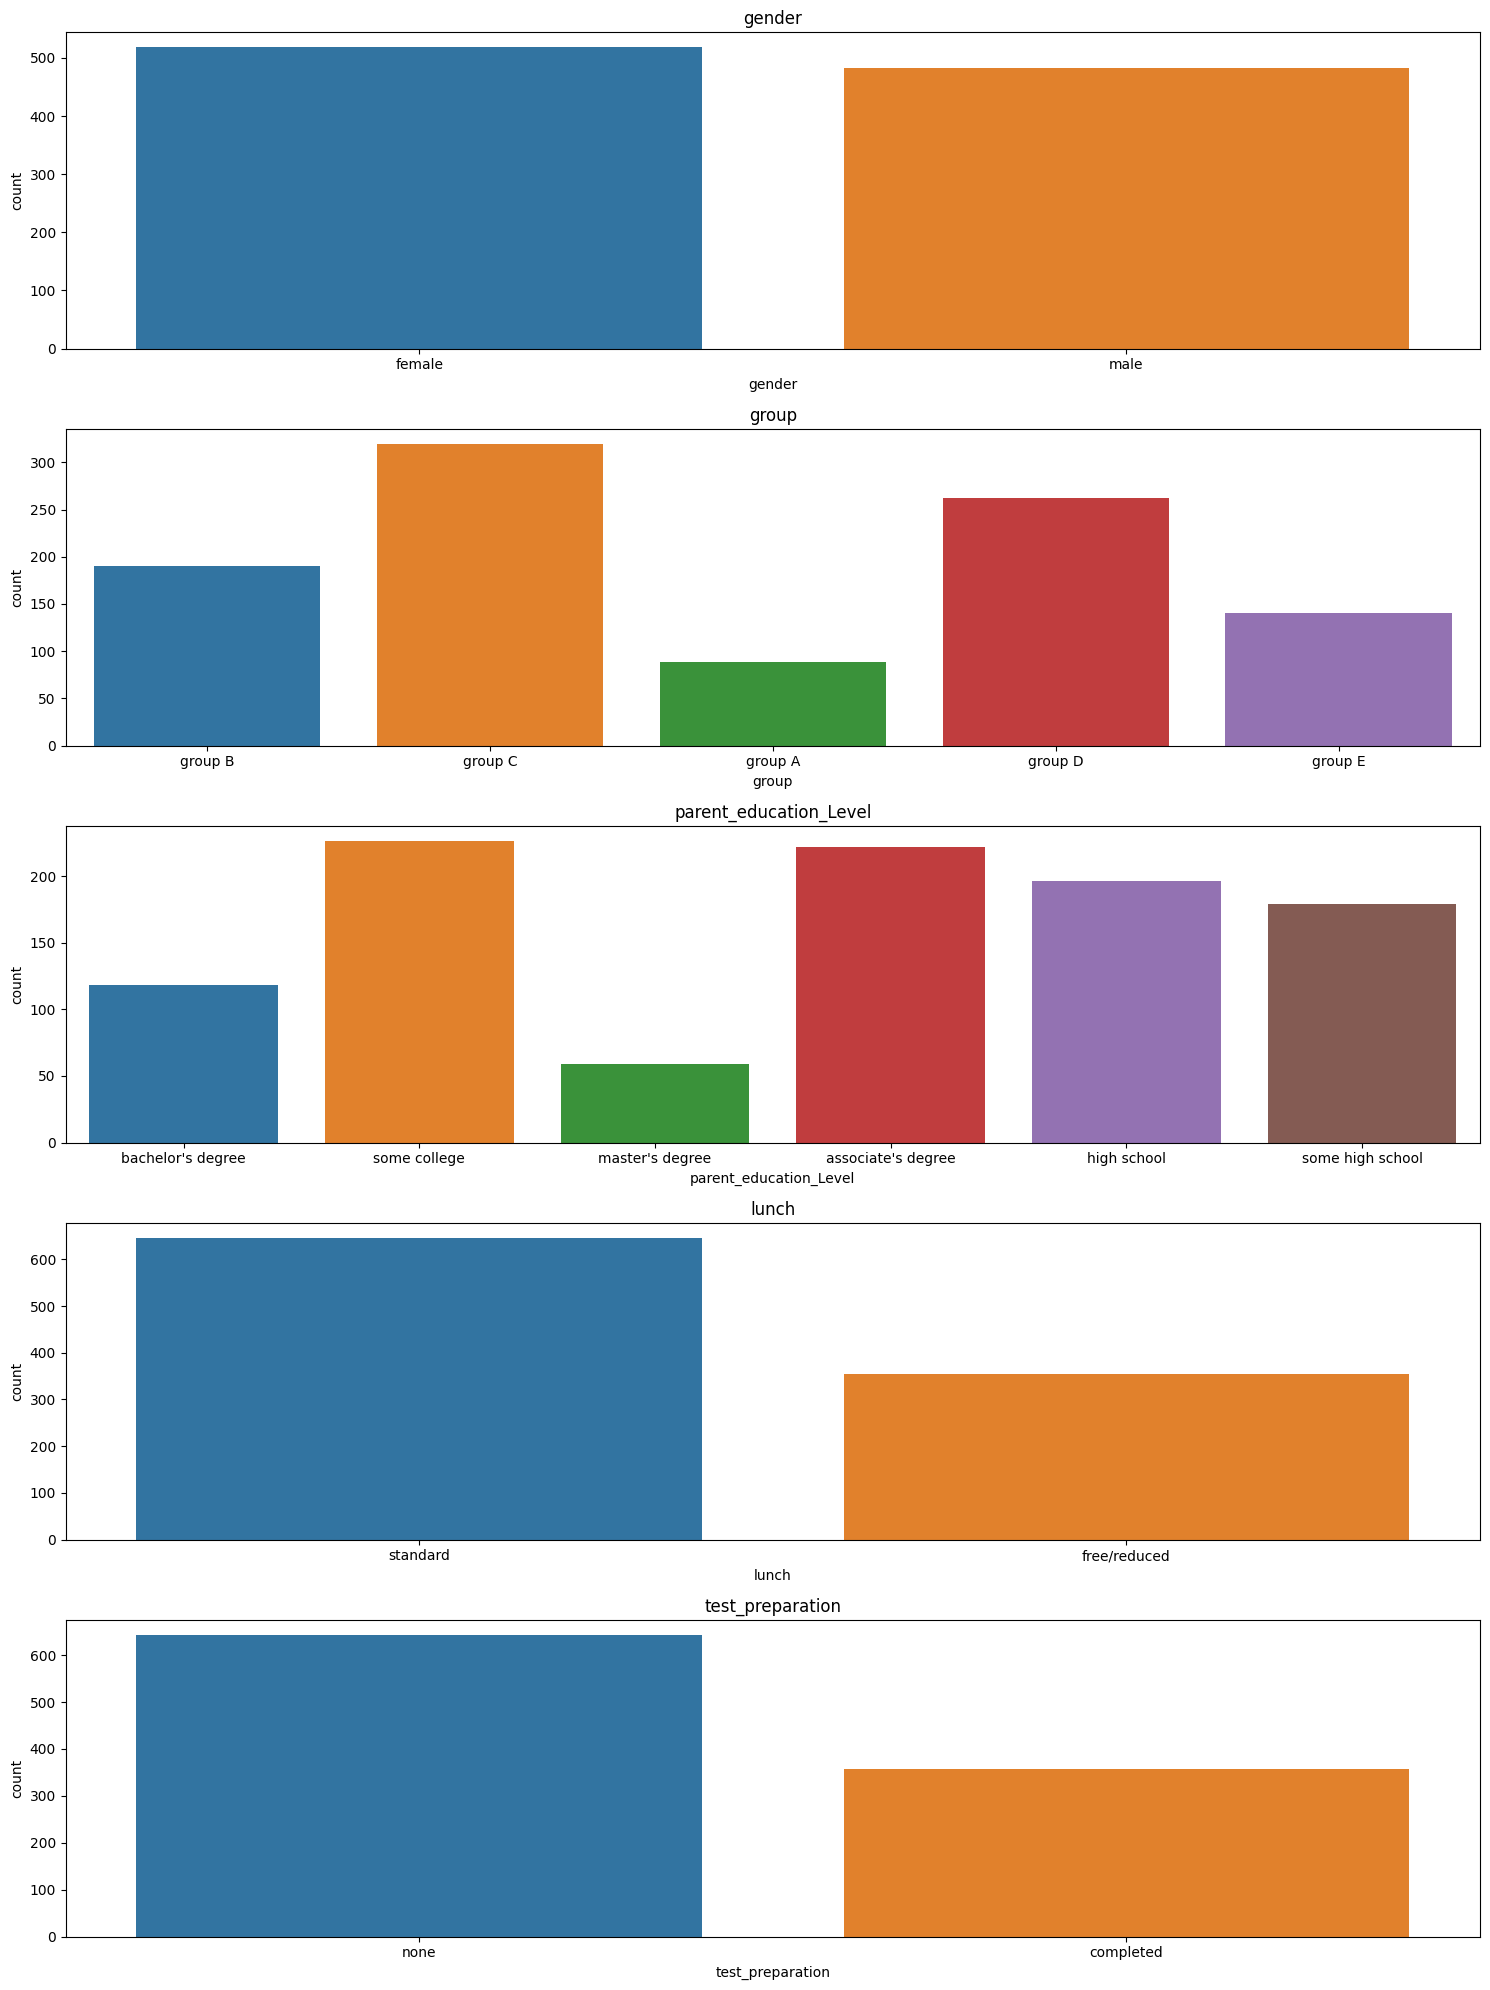

In [14]:
f, ax = plt.subplots(5,1, figsize=(15, 20))
ax = ax.flatten()

for index, cols in enumerate(object_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
      

plt.tight_layout()
plt.show()   

---------------

**Score by group**

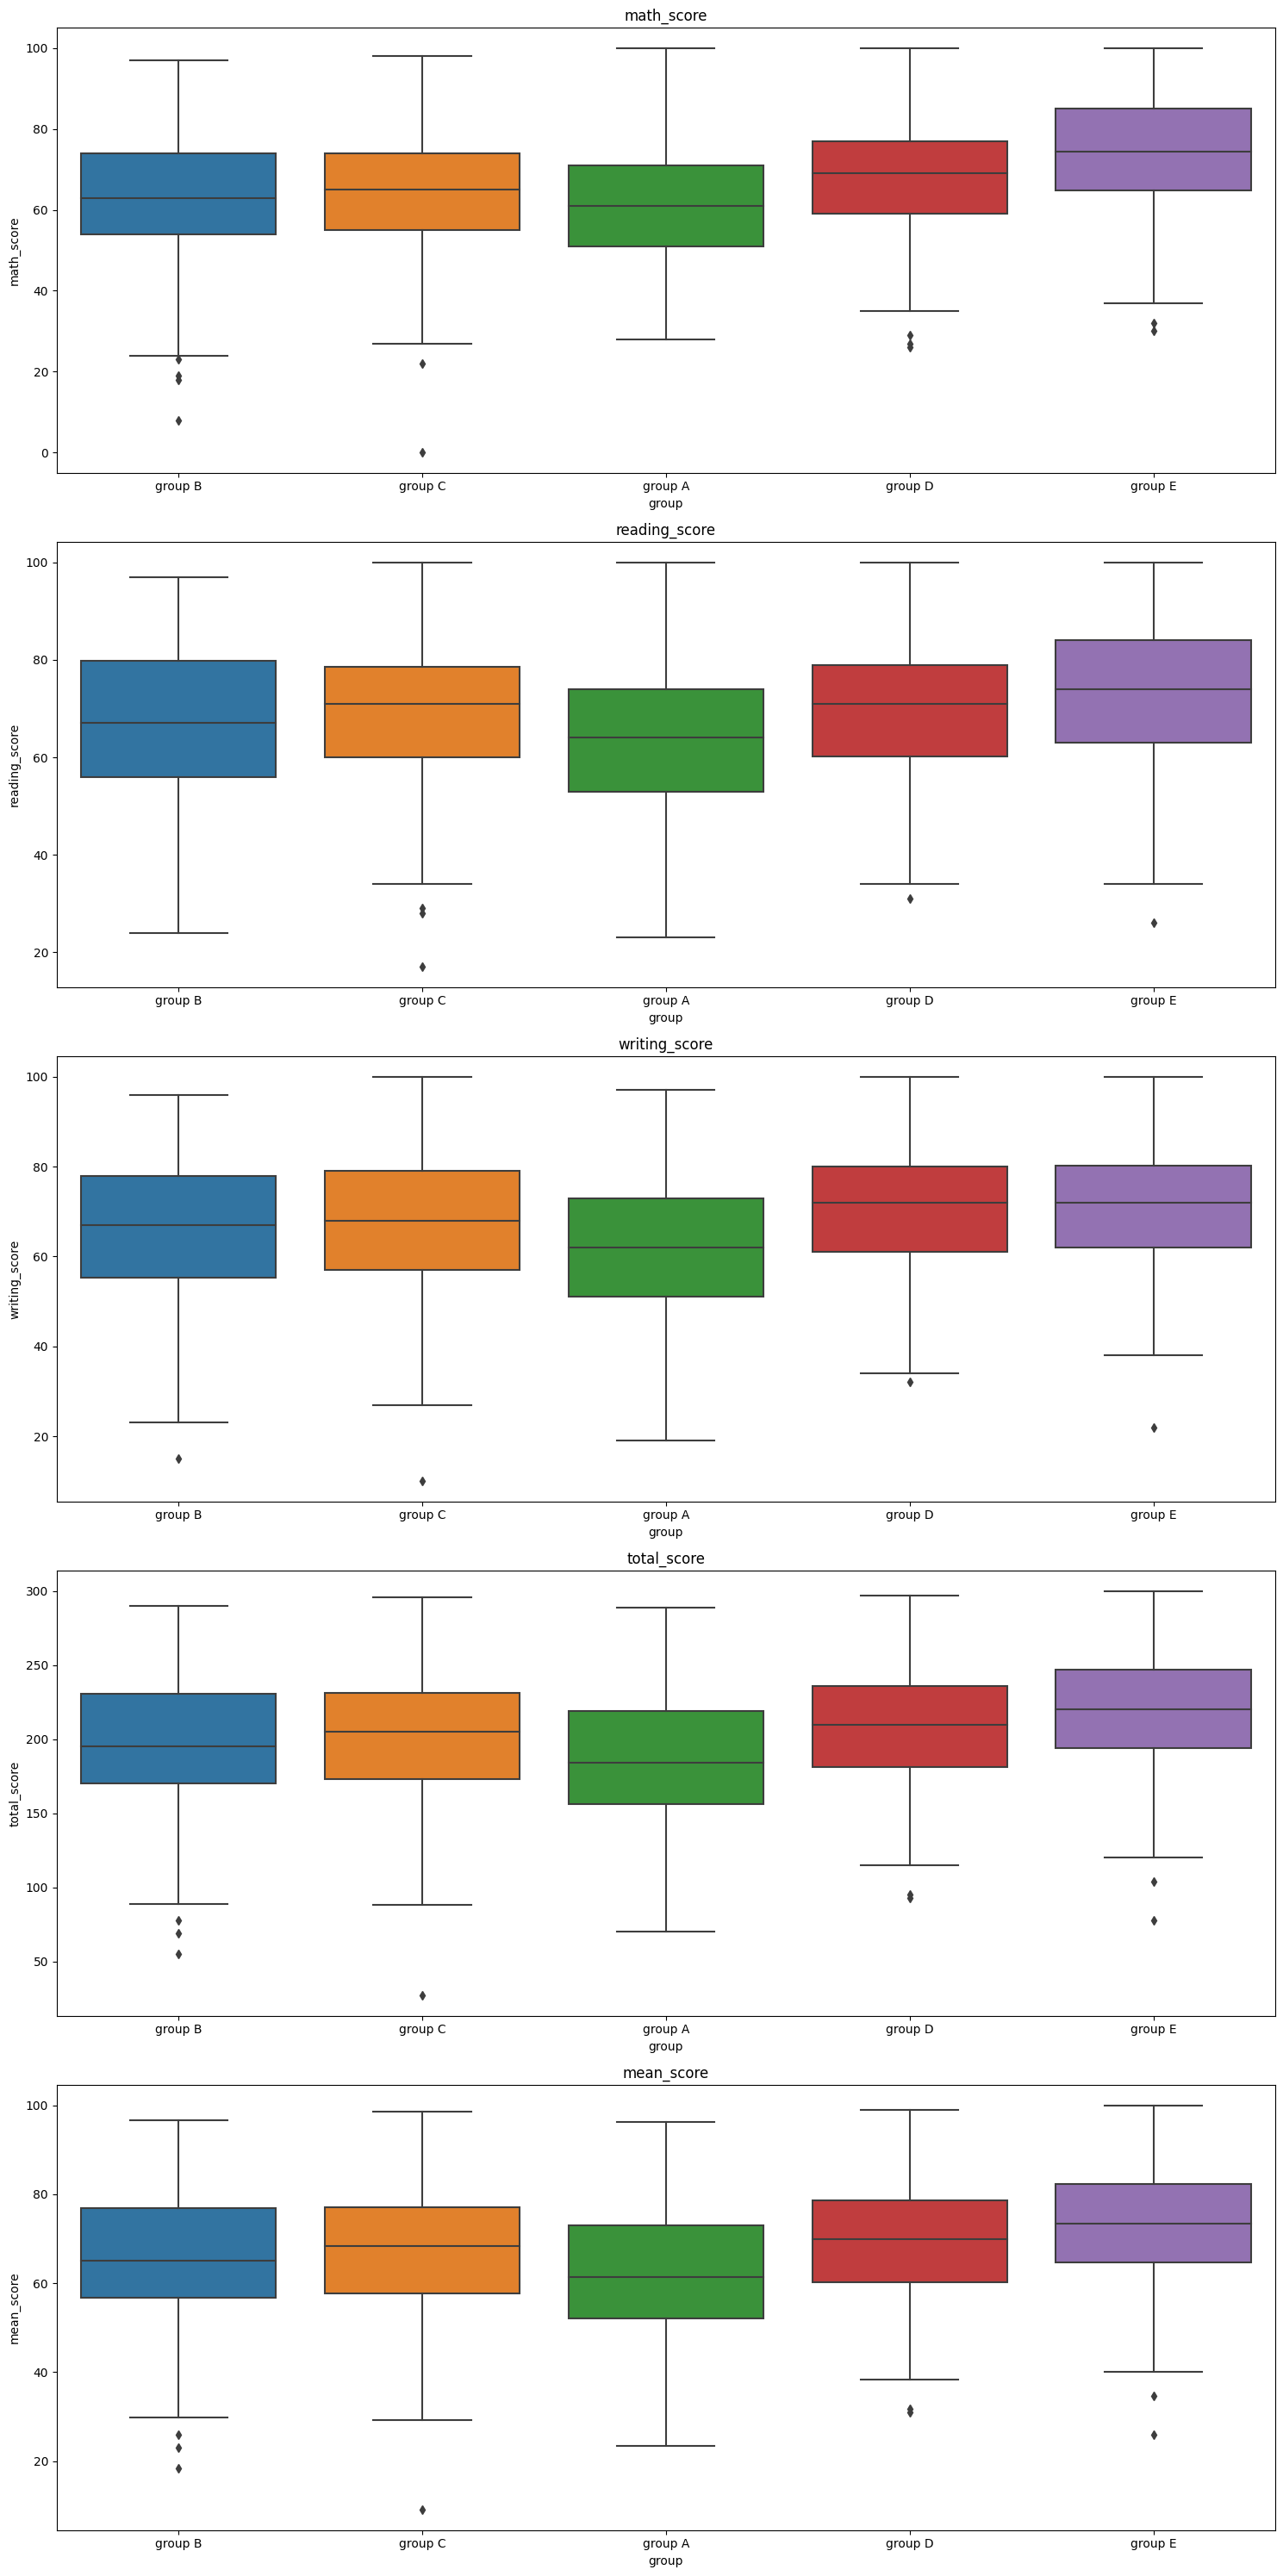

In [15]:
f, ax = plt.subplots(5,1, figsize=(15, 30))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data= df, x = 'group', y = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()  

---------------

**Score by gender**

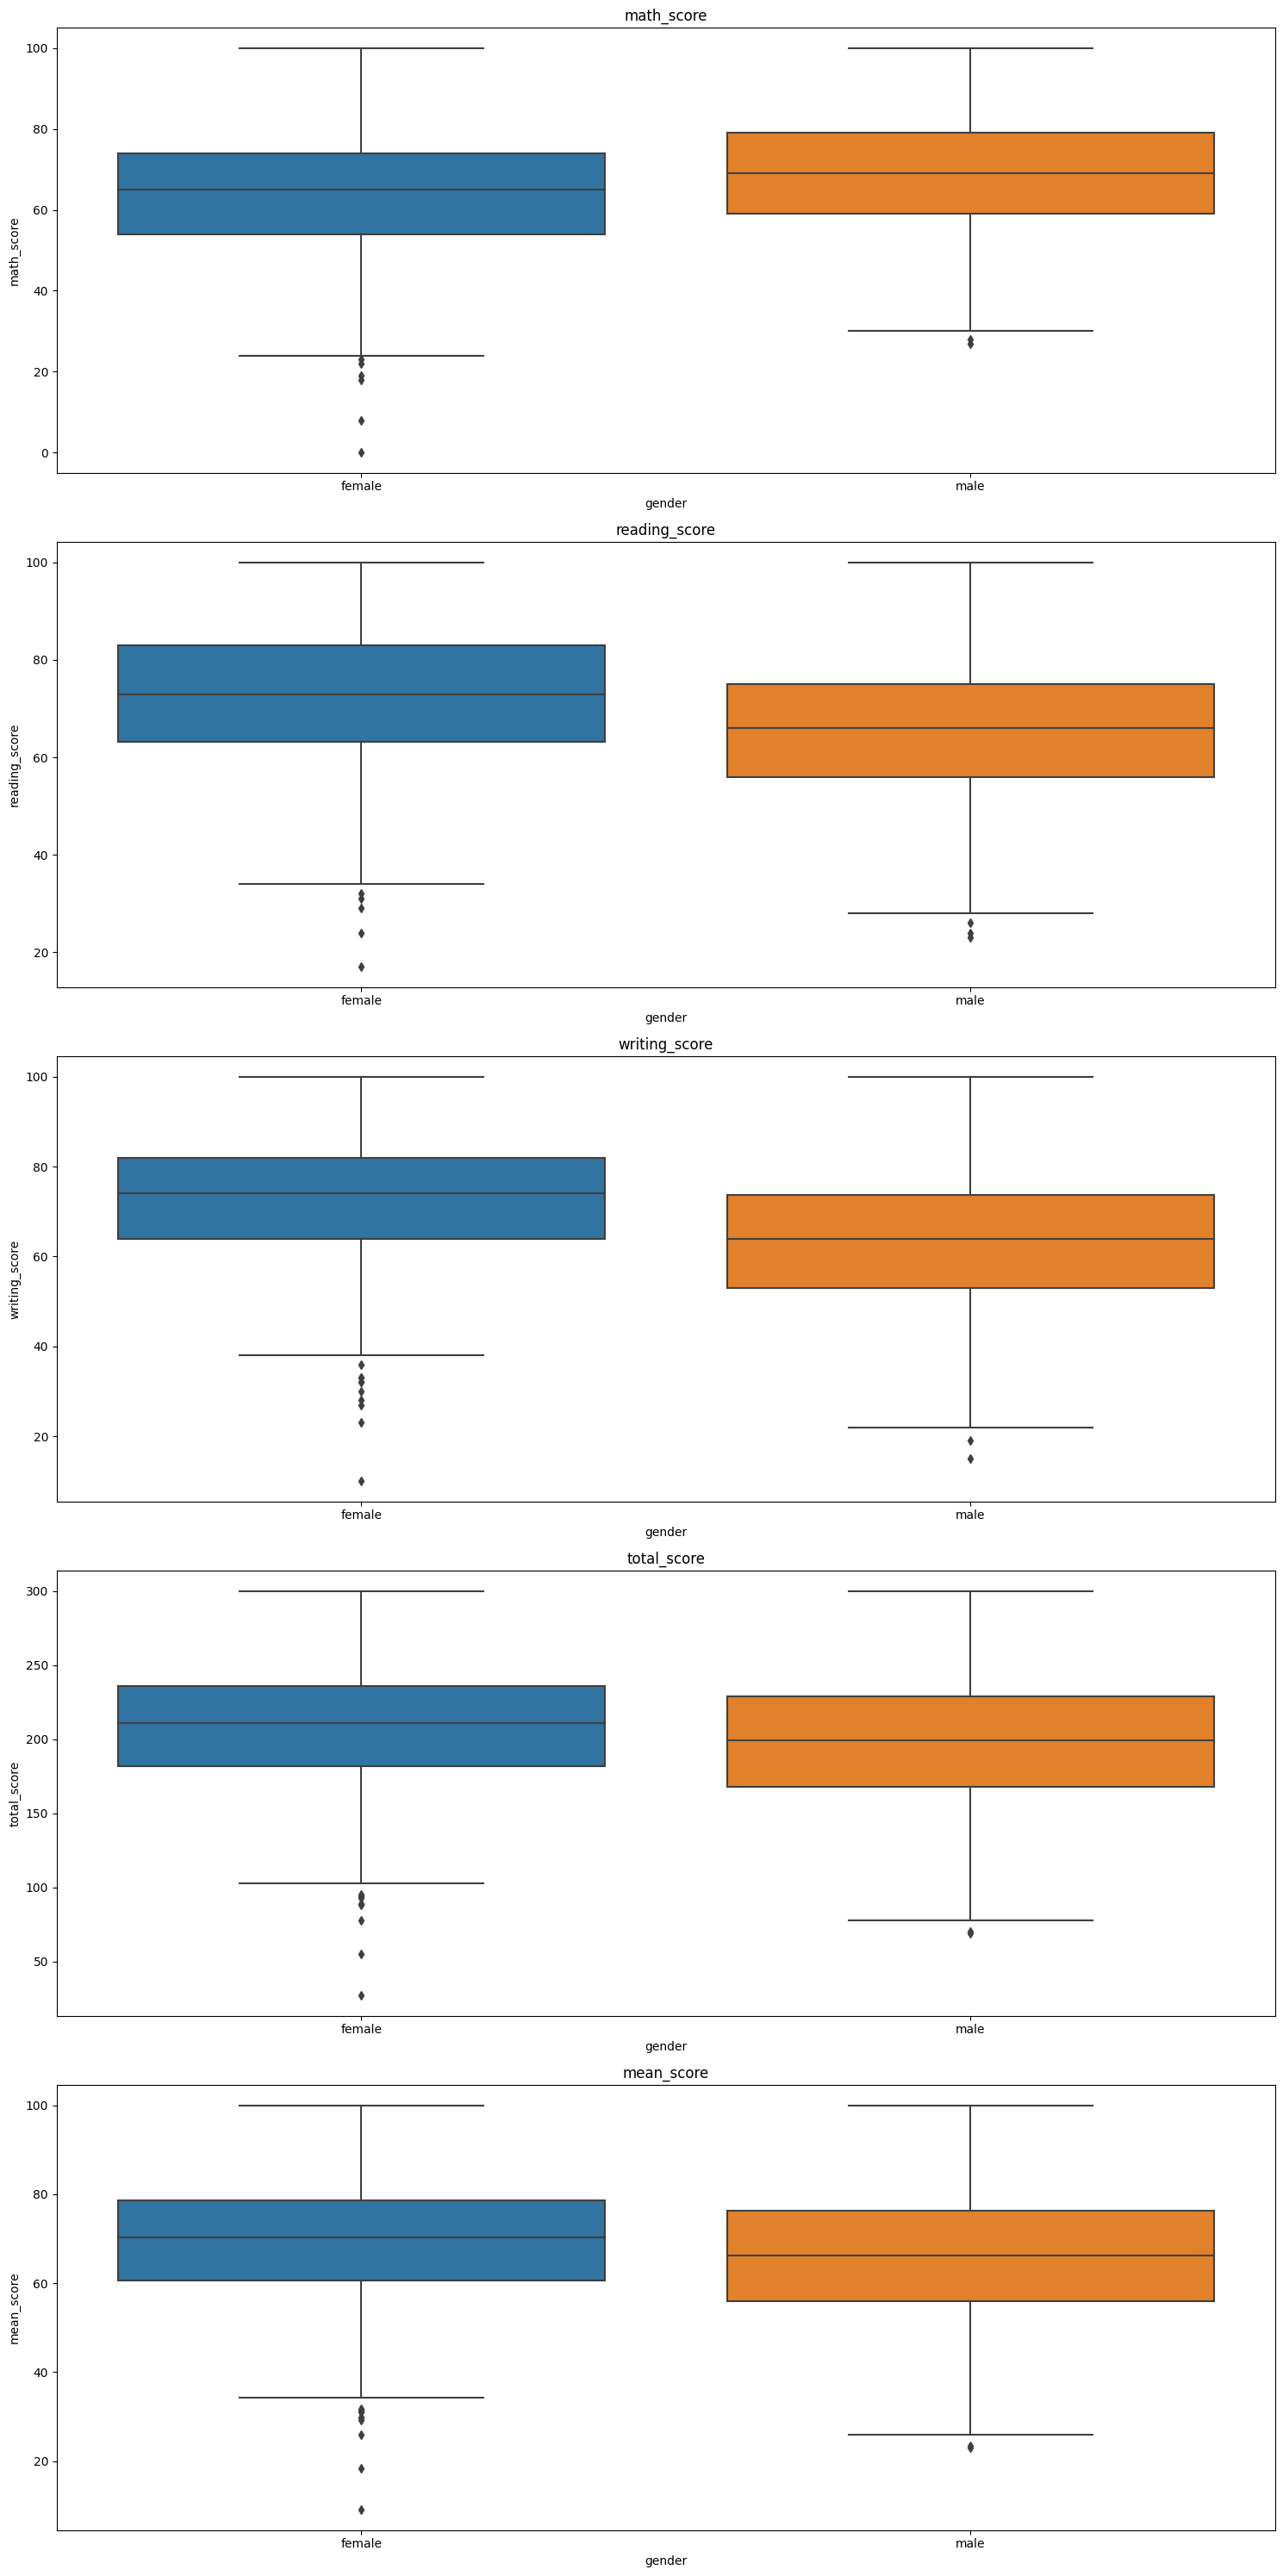

In [16]:
f, ax = plt.subplots(5,1, figsize=(15, 30))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data= df, x = 'gender', y = cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()  

---------------

**Correlation Heatmap**

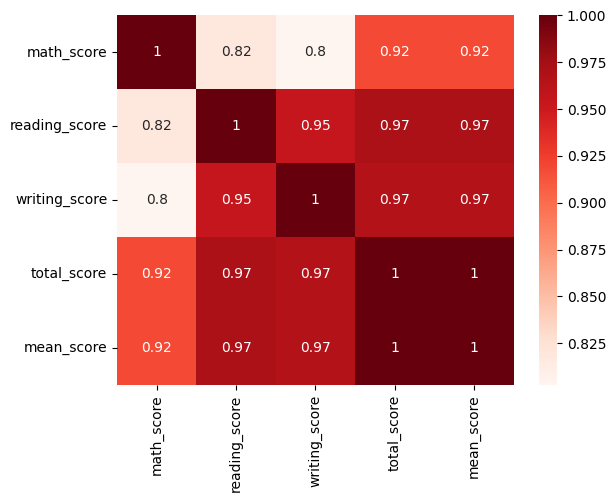

In [17]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='Reds')
plt.show()

-------------------

# **4. Modeling**

**Import**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, r2_score


**Data Preprocessing**

In [19]:
def Data_transform(df):
    df = df.drop(['parent_education_Level'], axis=1)
    df['gender'] = df['gender'].map({'male': 1, 'female': 0})
    df['group'] = df['group'].map({'group A': 1,'group B': 2,'group C': 3,'group D': 4,'group E': 5})
    df['lunch'] = df['lunch'].map({'standard':1, 'free/reduced': 0})
    df['test_preparation'] = df['test_preparation'].map({'none':0 , 'completed':1})
    
    return df

df = Data_transform(df)

In [20]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
LR = LinearRegression()

In [23]:
LR.fit(X_train, y_train)

LinearRegression()

In [25]:
pred_lr = LR.predict(X_test)

In [32]:
print(f'MAE : {mean_absolute_error(y_test,pred_lr)}')
print(f'MSE : {mean_squared_error(y_test,pred_lr)}')
print(f'r2_score : {r2_score(y_test,pred_lr)}')

MAE : 4.8155091025847697e-14
MSE : 2.6089156242546794e-27
r2_score : 1.0


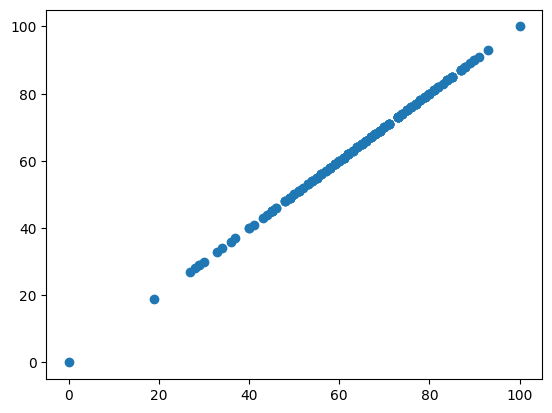

In [35]:
plt.scatter(y_test,pred_lr)
plt.show()

-------------

**Please leave your advice in the comments. Thank you**